# Đặt và trả lời các câu hỏi bằng trực quan hóa
- 5 câu hỏi được đặt ra dưới đây có thể dùng trực quan hóa để trả lời câu hỏi
- Mục đích: giúp hiểu sâu thêm về dữ liệu và rút trích được những giá trị quan trọng từ dữ liệu đang có

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df1 = pd.read_csv('../data/input_data/HoChiMinh.csv')
df2 = pd.read_csv('../data/input_data/BenTre.csv')
df3 = pd.read_csv('../data/input_data/DaNang.csv')
df4 = pd.read_csv('../data/input_data/HaNoi.csv')
df5 = pd.read_csv('../data/input_data/LangSon.csv')
df6 = pd.read_csv('../data/input_data/LamDong.csv')
df7 = pd.read_csv('../data/input_data/NgheAn.csv')
df8 = pd.read_csv('../data/input_data/SonLa.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.head()

,Address,Datetime,DatetimeEpoch,Tempmax,Tempmin,Temp,Dew,Humidity,Precip,Precipprob,...,Windgust,Windspeed,Winddir,Pressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase
0,Hồ Chí Minh,2019-01-01,1546275600,28.0,24.0,26.1,18.9,64.9,3.1,100.0,...,35.6,21.1,2.7,1012.2,59.8,10.3,72.0,6.3,4.0,0.83
1,Hồ Chí Minh,2019-01-02,1546362000,25.4,24.0,24.7,21.0,79.7,16.1,100.0,...,47.2,16.2,11.1,1011.7,61.5,9.4,52.4,4.5,3.0,0.87
2,Hồ Chí Minh,2019-01-03,1546448400,30.6,23.4,27.1,21.7,72.9,0.1,100.0,...,59.8,23.1,64.1,1011.9,58.6,10.1,154.4,13.3,6.0,0.90
3,Hồ Chí Minh,2019-01-04,1546534800,34.0,25.5,29.4,21.8,65.3,0.2,100.0,...,56.2,29.5,95.3,1012.5,43.4,10.3,209.4,18.2,7.0,0.94
4,Hồ Chí Minh,2019-01-05,1546621200,33.6,25.0,29.1,21.0,63.4,0.0,0.0,...,30.6,25.5,109.2,1012.3,32.6,10.3,233.9,20.2,8.0,0.97


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14616 entries, 0 to 1826
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Address         14616 non-null  object        
 1   Datetime        14616 non-null  datetime64[ns]
 2   DatetimeEpoch   14616 non-null  int64         
 3   Tempmax         14616 non-null  float64       
 4   Tempmin         14616 non-null  float64       
 5   Temp            14616 non-null  float64       
 6   Dew             14616 non-null  float64       
 7   Humidity        14616 non-null  float64       
 8   Precip          14616 non-null  float64       
 9   Precipprob      14616 non-null  float64       
 10  Precipcover     14616 non-null  float64       
 11  Preciptype      10414 non-null  object        
 12  Windgust        14616 non-null  float64       
 13  Windspeed       14616 non-null  float64       
 14  Winddir         14616 non-null  float64       
 15  Pre

In [5]:
df.columns

Index(['Address', 'Datetime', 'DatetimeEpoch', 'Tempmax', 'Tempmin', 'Temp',
       'Dew', 'Humidity', 'Precip', 'Precipprob', 'Precipcover', 'Preciptype',
       'Windgust', 'Windspeed', 'Winddir', 'Pressure', 'Cloudcover',
       'Visibility', 'Solarradiation', 'Solarenergy', 'Uvindex', 'Moonphase',
       'Year', 'Month'],
      dtype='object')

## Ask Meaningful Questions

### 1. Dựa trên yếu tố khí hậu, tỉnh thành nào có sự khác biệt đáng chú ý nhất?

#### Mục đích của câu hỏi: 
So sánh các tỉnh thành về các yếu tố khí hậu chính (nhiệt độ, độ ẩm, lượng mưa, tốc độ gió, áp suất) để xác định những nơi có đặc điểm khí hậu khác biệt nổi bật. Hỗ trợ trong việc ưu tiên các biện pháp thích ứng với biến đổi khí hậu hoặc lập kế hoạch phát triển vùng.

#### Cách trả lời câu hỏi:
- Bước 1 - Tiền xử lý:
  - Tính trung bình các đặc trưng `Temp`, `Humidity`, `Precip`, `Windspeed`, `Pressure` để theo `Address` (tỉnh thành)
  - Chuẩn hóa dữ liệu về thang đo [0, 1] để so sánh dễ dàng hơn.
  - Nhóm dữ liệu thành hai khu vực: miền Bắc và miền Nam.

In [6]:
# Chọn các cột cần thiết
data = df[['Address', 'Temp', 'Humidity', 'Precip', 'Windspeed', 'Pressure']]

# Tính giá trị trung bình theo tỉnh thành
radar_df = data.groupby('Address').mean()

# Chuẩn hóa dữ liệu về thang đo [0, 1]
radar_normalized_df = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())
radar_normalized_df = radar_normalized_df.reset_index()

# Danh sách các tỉnh miền Bắc và miền Nam
northern = ['Hà Nội', 'Lạng Sơn', 'Nghệ An', 'Sơn La']
southern = ['Hồ Chí Minh', 'Bến Tre', 'Lâm Đồng', 'Đà Nẵng']

# Tách dữ liệu theo khu vực
northern_df = radar_normalized_df[radar_normalized_df['Address'].isin(northern)]
southern_df = radar_normalized_df[radar_normalized_df['Address'].isin(southern)]

radar_df

,Temp,Humidity,Precip,Windspeed,Pressure
Address,,,,,
Bến Tre,27.857307,80.422277,5.061138,16.182649,1009.270005
Hà Nội,24.873454,77.254570,4.686283,17.097756,1011.207006
Hồ Chí Minh,28.409305,77.342146,4.911166,19.042912,1009.102244
Lâm Đồng,19.685714,85.239573,6.029776,9.957417,1013.347619
Lạng Sơn,22.150301,80.707280,4.103327,14.292282,1011.812151
Nghệ An,25.515982,80.472085,7.457526,17.834921,1010.718610
Sơn La,22.080241,78.647838,3.838807,10.612151,1011.697154
Đà Nẵng,26.919540,77.920471,7.166361,17.810564,1010.634592


- Bước 2 - Vẽ biểu đồ: Sử dụng Radar Chart (biểu đồ radar) để biểu diễn các đặc trưng khí hậu cho từng nhóm tỉnh thành. Biểu đồ này cho phép so sánh trực quan các đặc điểm khí hậu của từng khu vực

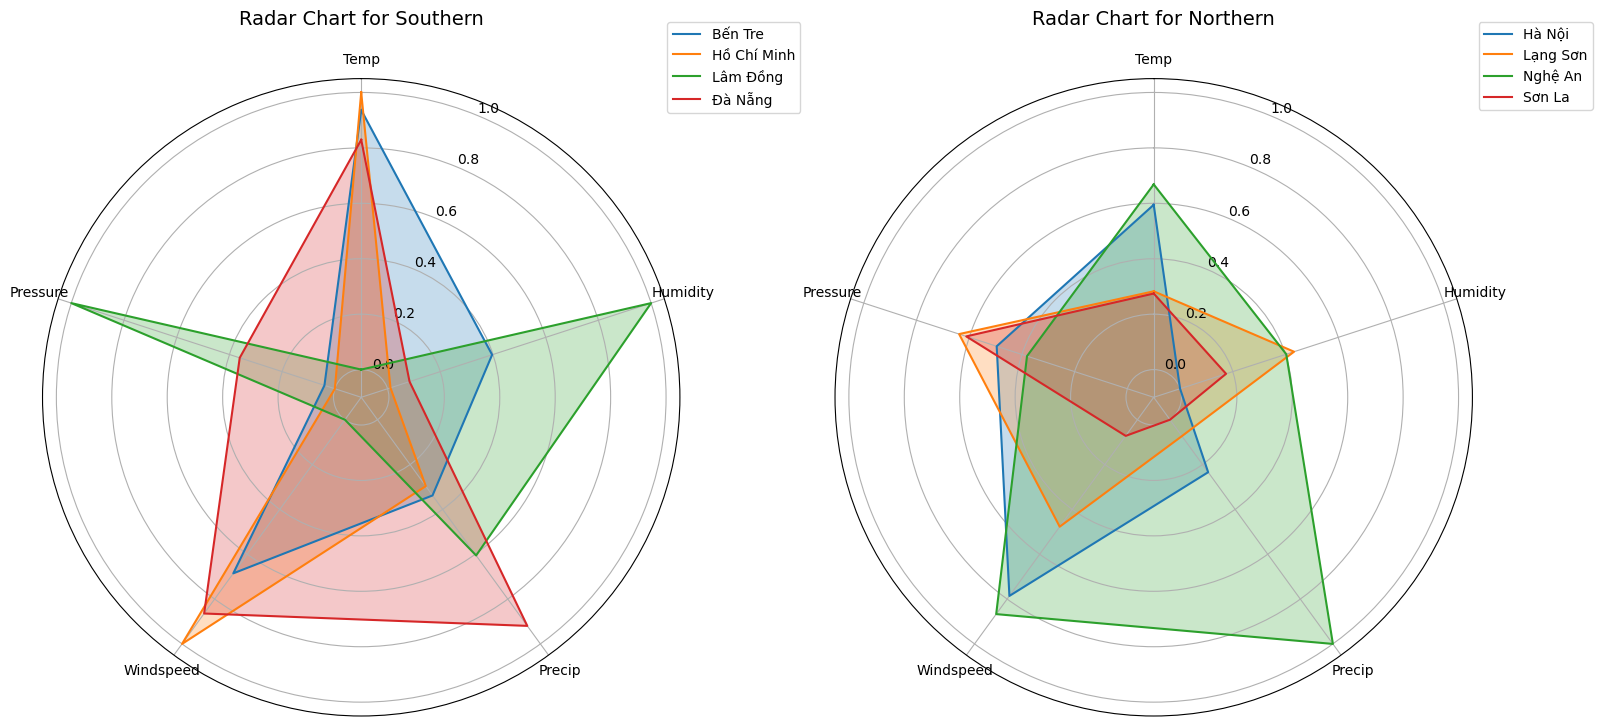

In [7]:
# Hàm để tạo góc cho các trục radar
def get_angles(num_vars):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Đóng vòng tròn
    return angles

# Hàm để vẽ radar chart
def plot_radar(ax, data, title, categories):
    num_vars = len(categories)
    angles = get_angles(num_vars)
    
    for i, row in data.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['Address'])
        ax.fill(angles, values, alpha=0.25)
    
    # Cài đặt các trục
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([f'{tick:.1f}' for tick in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]], fontsize=10)
    ax.set_ylim(-0.1, 1.05)
    ax.set_title(title, size=14, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    

# Các cột yếu tố khí hậu
categories = ['Temp', 'Humidity', 'Precip', 'Windspeed', 'Pressure']

# Thiết lập biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Vẽ radar chart cho khu vực miền Nam
plot_radar(axs[0], southern_df, "Radar Chart for Southern", categories)

# Vẽ radar chart cho khu vực miền Bắc
plot_radar(axs[1], northern_df, "Radar Chart for Northern", categories)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Phân tích:

Miền Nam:
- Lâm Đồng: Nổi bật với nhiệt độ thấp nhất (~19.7°C) và độ ẩm cao nhất (~85.2%), đặc trưng khí hậu cao nguyên.
- Hồ Chí Minh: Nhiệt độ trung bình cao nhất (~28.4°C) và tốc độ gió cao nhất (~19.0 km/h).
- Đà Nẵng: Lượng mưa trung bình cao (~7.2 mm).

Miền Bắc:
- Nghệ An: Lượng mưa (~7.5 mm) và tốc độ gió cao nhất (~17.8 km/h), khí hậu khắc nghiệt hơn.
- Hà Nội: Nhiệt độ trung bình cao nhất (~24.9°C)
- Sơn La: Lượng mưa thấp nhất (~3.8 mm).

### Kết luận:

Tỉnh thành có sự khác biệt khí hậu nổi bật nhất:
- Miền Nam: Lâm Đồng nổi bật với nhiệt độ thấp, độ ẩm cao, cho thấy đặc trưng khí hậu vùng cao nguyên.
- Miền Bắc: Nghệ An có lượng mưa và tốc độ gió cao nhất, phản ánh khí hậu khắc nghiệt hơn so với các tỉnh khác.

So sánh giữa hai khu vực địa lý:
- Miền Nam có sự chênh lệch đáng kể về nhiệt độ (cao ở các tỉnh đồng bằng, thấp ở vùng cao nguyên như Lâm Đồng).
- Miền Bắc ít biến động về độ ẩm và áp suất, nhưng có sự phân hóa rõ về lượng mưa.

Ảnh hưởng đến hiện tượng thời tiết cực đoan:
- Miền Nam: Khu vực như Đà Nẵng và Lâm Đồng có lượng mưa lớn, chịu ảnh hưởng bởi các hiện tượng mưa lớn hoặc lũ lụt.
- Miền Bắc: Nghệ An với lượng mưa và tốc độ gió cao có nguy cơ chịu ảnh hưởng lớn từ bão hoặc áp thấp nhiệt đới.  

### 2. Xu hướng chung của các yếu tố khí hậu (nhiệt độ, lượng mưa) có chỉ ra sự thay đổi lớn nào về mặt khí hậu không?

#### Mục đích: 
Đánh giá xu hướng thay đổi của nhiệt độ và lượng mưa theo thời gian, từ đó xác định liệu có sự thay đổi lớn nào về mặt khí hậu hay không. Phân tích này giúp nhận diện các thay đổi (nếu có) có thể ảnh hưởng đến nông nghiệp, sinh hoạt, và các hệ sinh thái.

#### Cách trả lời câu hỏi:
- Bước 1 - Tiền xử lý:
    - Dữ liệu nhiệt độ `Temp`, `Tempmax`, `Tempmin` được chuyển đổi thành chuỗi thời gian (time series) và được tính giá trị lớn nhất theo tuần để đảm bảo theo dõi xu hướng tối đa của nhiệt độ theo thời gian.
    - Dữ liệu lượng mưa `Precip` được chuyển đổi thành chuỗi thời gian (time series) và được tính tổng theo tuần để xác định sự thay đổi tổng lượng mưa theo thời gian.

In [8]:
# Chuyển đổi dữ liệu Temp, Tempmax, Tempmin thành chuỗi thời gian và tính giá trị lớn nhất theo tuần (W).
data = df.set_index('Datetime')
max_temp_df = data[['Temp', 'Tempmax', 'Tempmin']].resample('W').max()
max_temp_df.head()

,Temp,Tempmax,Tempmin
Datetime,,,
2019-01-06,29.4,34.0,25.5
2019-01-13,28.8,34.6,25.5
2019-01-20,28.8,33.6,25.6
2019-01-27,28.1,33.6,24.4
2019-02-03,28.9,35.2,25.9


In [9]:
# Chuyển đổi dữ liệu Precip thành chuỗi thời gian và tính tổng lượng mưa theo tuần (weekly).
data = df.set_index('Datetime')
total_precip_df = data[['Precip']].resample('W').sum()
total_precip_df.head()

,Precip
Datetime,
2019-01-06,90.680
2019-01-13,104.417
2019-01-20,196.574
2019-01-27,113.028
2019-02-03,14.825


- Bước 2 - Vẽ biểu đồ: 
  - Sử dụng biểu đồ đường (Line Chart) để thể hiện các giá trị nhiệt độ trung bình (Temp), nhiệt độ cao nhất (Tempmax), và nhiệt độ thấp nhất (Tempmin) từ năm 2019 đến 2023.
  - Sử dụng biểu đồ đường để biểu diễn tổng lượng mưa hàng tuần (Precip) trong cùng khoảng thời gian.

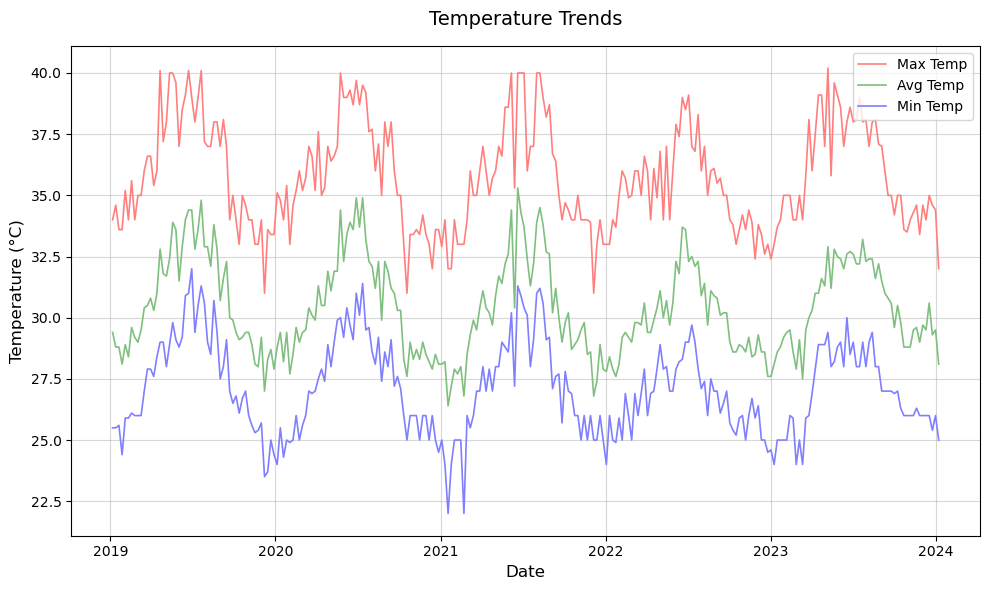

In [10]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ đường nhiệt độ trung bình, nhiệt độ cao nhất, nhiệt độ thấp nhất
plt.plot(max_temp_df.index, max_temp_df['Tempmax'], label='Max Temp', color='#ff7f7f', alpha=1, linewidth=1.2)
plt.plot(max_temp_df.index, max_temp_df['Temp'], label='Avg Temp', color='#7fbf7f', alpha=1, linewidth=1.2)
plt.plot(max_temp_df.index, max_temp_df['Tempmin'], label='Min Temp', color='#7f7fff', alpha=1, linewidth=1.2)

# Thêm tiêu đề và tên trục
plt.title('Temperature Trends', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.5)

# Hiển thị chú thích và biểu đồ
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

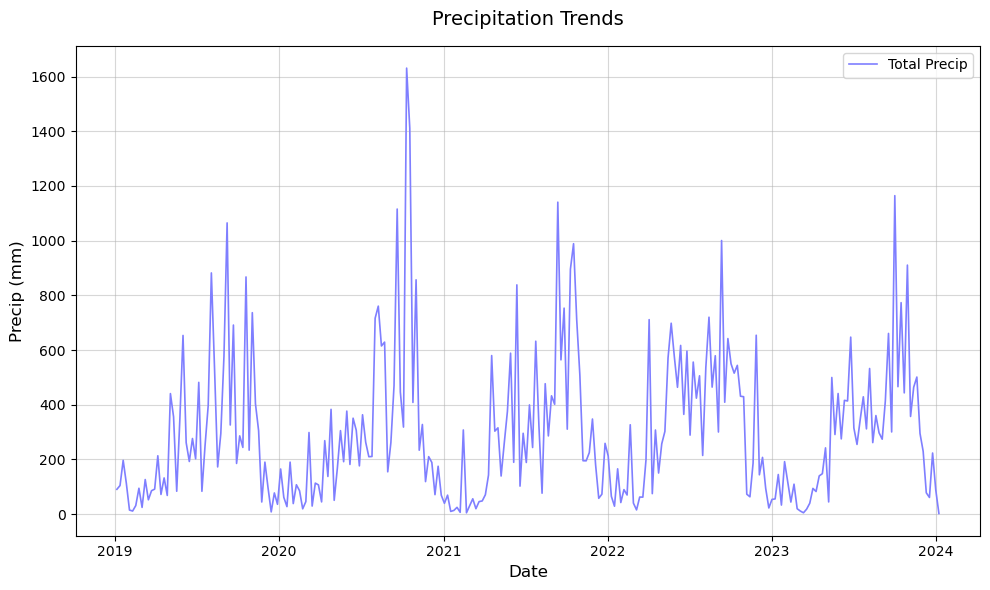

In [11]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ đường lượng mưa
plt.plot(total_precip_df.index, total_precip_df['Precip'], label='Total Precip', color='#7f7fff', alpha=1, linewidth=1.2)

# Thêm tiêu đề và tên trục
plt.title('Precipitation Trends', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precip (mm)', fontsize=12)
plt.grid(True, alpha=0.5)

# Hiển thị chú thích và biểu đồ
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

### Phân tích xu hướng chung của các yếu tố khí hậu

#### Xu hướng nhiệt độ (Biểu đồ Temperature Trends):
- Nhiệt độ cao nhất (Max Temp - màu đỏ) dao động trong khoảng từ khoảng 32°C đến 41°C. Nhiệt độ trung bình (Avg Temp - màu xanh lá) dao động từ khoảng 26°C đến 35°C. Nhiệt độ thấp nhất (Min Temp - màu xanh dương) dao động từ khoảng 22°C đến 32°C.
- Có thể thấy tính chu kỳ theo mùa tương đối rõ ràng. Nhiệt độ có xu hướng cao hơn vào giữa năm (khoảng tháng 5-8) và thấp hơn vào đầu và cuối năm (khoảng tháng 12-2).
- Trong khoảng thời gian từ 2019 đến 2023, không có sự thay đổi lớn rõ ràng về xu hướng nhiệt độ. Nhiệt độ vẫn biến động theo chu kỳ mùa, không có dấu hiệu nóng lên hay lạnh đi trông thấy. Tuy nhiên cần lưu ý, các điểm có Max Temp cao hơn vào các năm 2020, 2021 và 2023 (đạt khoảng 41°C) có thể là dấu hiệu của các đợt nắng nóng gay gắt hơn.

#### Xu hướng lượng mưa (Biểu đồ Precipitation Trends):
- Lượng mưa hàng tuần (Total Precip - màu xanh dương) dao động rất lớn, từ gần 0 mm đến hơn 1600 mm.
- Có thể thấy tính chu kỳ trong phân bố lượng mưa, nhưng không đều đặn như nhiệt độ.
- Trong khoảng thời gian từ 2019 đến 2023, không có sự thay đổi lớn rõ ràng về xu hướng tổng lượng mưa. Tuy nhiên, sự xuất hiện của các đỉnh mưa lớn (trên 1000mm) và có vẻ thường xuyên hơn trong những năm 2020, 2021, 2023 có thể là dấu hiệu của các trận mưa cực đoan, lượng mưa biến động mạnh hơn, thất thường hơn.

### Kết luận
Dựa trên hai biểu đồ, trong khoảng thời gian từ 2019 đến 2023, chưa thấy sự thay đổi lớn rõ rệt về mặt khí hậu dựa trên xu hướng nhiệt độ và lượng mưa trung bình. Tuy nhiên, có những dấu hiệu cho thấy khả năng xuất hiện các hiện tượng thời tiết cực đoan như nắng nóng gay gắt hơn (dựa vào Max Temp) và mưa lớn bất thường (dựa vào các đỉnh mưa cao).

### 3. Nhiệt độ trung bình của các mùa trong năm 2022-2023 có xu hướng tăng hay giảm? Xu hướng này có gì đáng chú ý?

#### Mục đích của câu hỏi: Xác định xu hướng tăng/giảm nhiệt độ trung bình theo mùa trong giai đoạn 2022-2023 ở miền Bắc và miền Nam Việt Nam. Qua đó, nhận biết các dấu hiệu của biến đổi khí hậu và so sánh sự khác biệt giữa hai khu vực.

#### Cách trả lời câu hỏi:
- Bước 1 - Tiền xử lý:
    - Chia dữ liệu theo hai khu vực: miền Bắc và miền Nam, với các tỉnh thành như sau: 
        - Miền Bắc: Hà Nội, Lạng Sơn, Nghệ An, Sơn La.
        - Miền Nam: Hồ Chí Minh, Bến Tre, Lâm Đồng, Đà Nẵng.
    - Dữ liệu nhiệt độ `Temp` được chuyển đổi thành chuỗi thời gian (time series) và được tính giá trị trung bình theo ngày.
    - Lọc khoảng thời gian từ 2022-03-01 đến 2023-02-28 cho miền Bắc và từ 2022-05-01 đến 2023-04-30 cho miền Nam để phân tích nhiệt độ theo từng mùa:
        - Miền bắc: Chia dữ liệu thành bốn mùa (xuân, hạ, thu, đông) dựa trên ngày tháng cụ thể.
        - Miền nam: Chia dữ liệu thành hai mùa mùa mưa (tháng 5–11) và mùa khô (tháng 12–4).

In [12]:
# Danh sách tỉnh thành
northern = ['Hà Nội', 'Lạng Sơn', 'Nghệ An', 'Sơn La']
southern = ['Hồ Chí Minh', 'Bến Tre', 'Lâm Đồng', 'Đà Nẵng']

# Tách dữ liệu theo khu vực
northern_df = df[df['Address'].isin(northern)]
southern_df = df[df['Address'].isin(southern)]

# Tính nhiệt độ trung bình ngày
northern_df = northern_df.groupby('Datetime')['Temp'].mean().reset_index()
southern_df = southern_df.groupby('Datetime')['Temp'].mean().reset_index()

# Lọc dữ liệu theo khoảng thời gian
northern_df = northern_df.set_index('Datetime')['2022-03-01':'2023-02-28']
southern_df = southern_df.set_index('Datetime')['2022-05-01':'2023-04-30']

# Chia dữ liệu theo mùa
northern_spring = northern_df['2022-03-01':'2022-05-31']
northern_summer = northern_df['2022-06-01': '2022-08-31']
northern_fall = northern_df['2022-09-01': '2022-11-30']
northern_winter = northern_df['2022-12-01': '2023-02-28']

southern_rainy  = southern_df['2022-05-01':'2022-11-30']
southern_dry = southern_df['2022-12-01': '2023-04-30']

- Bước 2 - Vẽ biểu đồ: Sử dụng biểu đồ đường (Line Chart) để thể hiện xu hướng nhiệt độ trung bình trong bốn mùa (xuân, hạ, thu, đông) cho miền Bắc và trong hai mùa (mùa mưa, mùa khô) cho miền Nam.

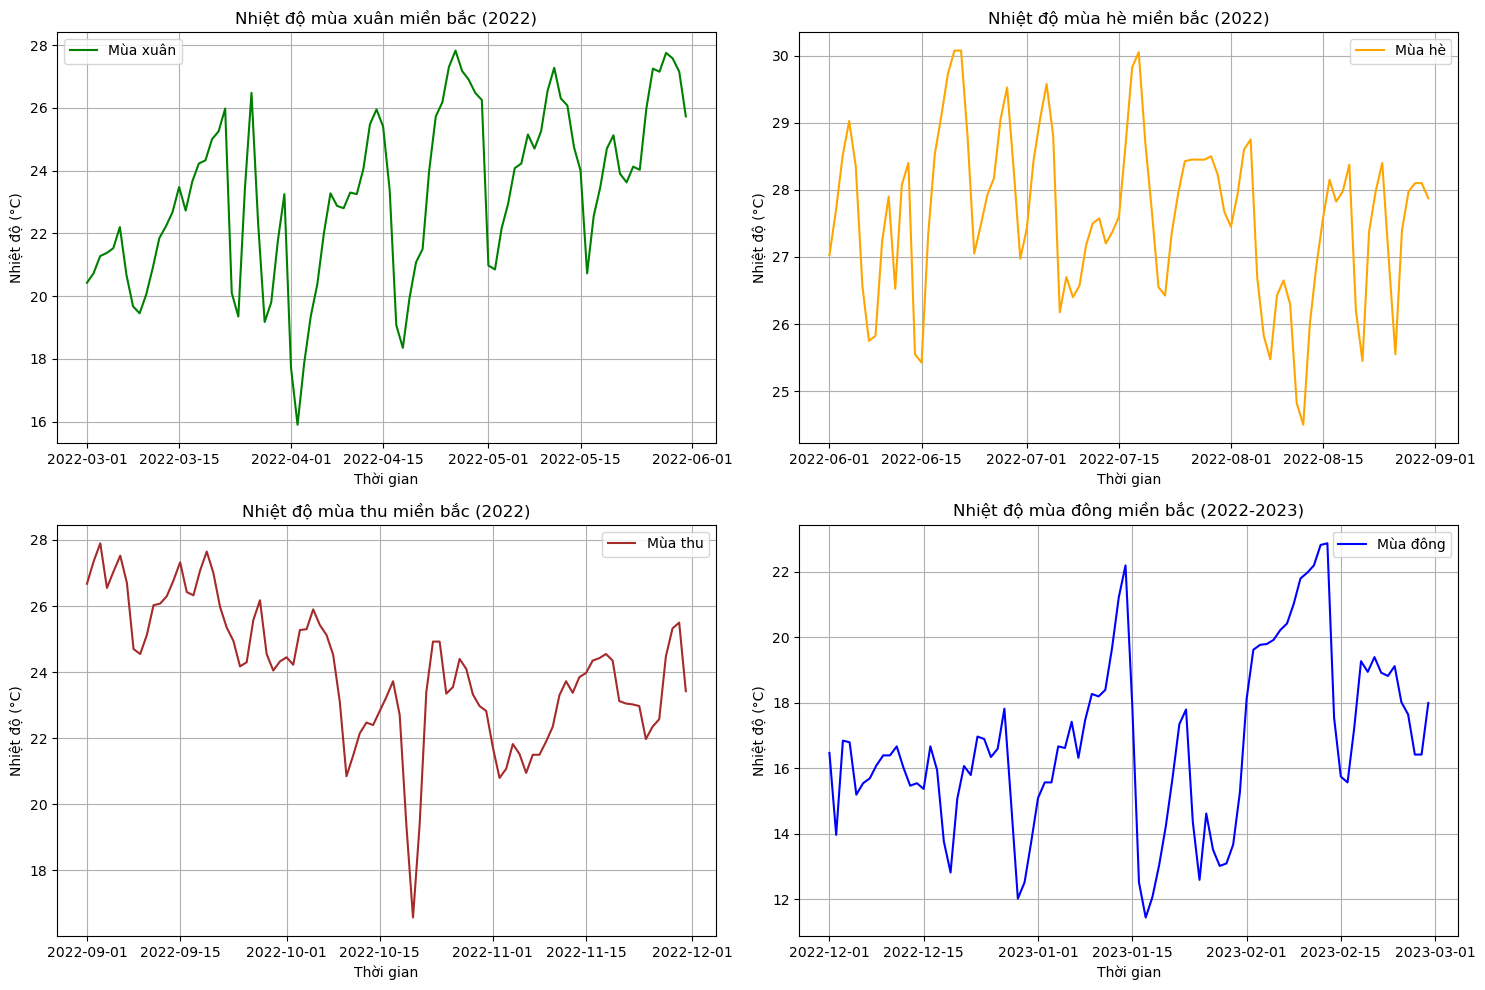

In [13]:
# Thiết lập biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Mùa xuân
axs[0, 0].plot(northern_spring.index, northern_spring['Temp'], color='green', label='Mùa xuân')
axs[0, 0].set_title("Nhiệt độ mùa xuân miền bắc (2022)")
axs[0, 0].set_xlabel("Thời gian")
axs[0, 0].set_ylabel("Nhiệt độ (°C)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Mùa hè
axs[0, 1].plot(northern_summer.index, northern_summer['Temp'], color='orange', label='Mùa hè')
axs[0, 1].set_title("Nhiệt độ mùa hè miền bắc (2022)")
axs[0, 1].set_xlabel("Thời gian")
axs[0, 1].set_ylabel("Nhiệt độ (°C)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Mùa thu
axs[1, 0].plot(northern_fall.index, northern_fall['Temp'], color='brown', label='Mùa thu')
axs[1, 0].set_title("Nhiệt độ mùa thu miền bắc (2022)")
axs[1, 0].set_xlabel("Thời gian")
axs[1, 0].set_ylabel("Nhiệt độ (°C)")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Mùa đông
axs[1, 1].plot(northern_winter.index, northern_winter['Temp'], color='blue', label='Mùa đông')
axs[1, 1].set_title("Nhiệt độ mùa đông miền bắc (2022-2023)")
axs[1, 1].set_xlabel("Thời gian")
axs[1, 1].set_ylabel("Nhiệt độ (°C)")
axs[1, 1].legend()
axs[1, 1].grid(True)

# Hiển thị chú thích và biểu đồ
plt.tight_layout()
plt.show()

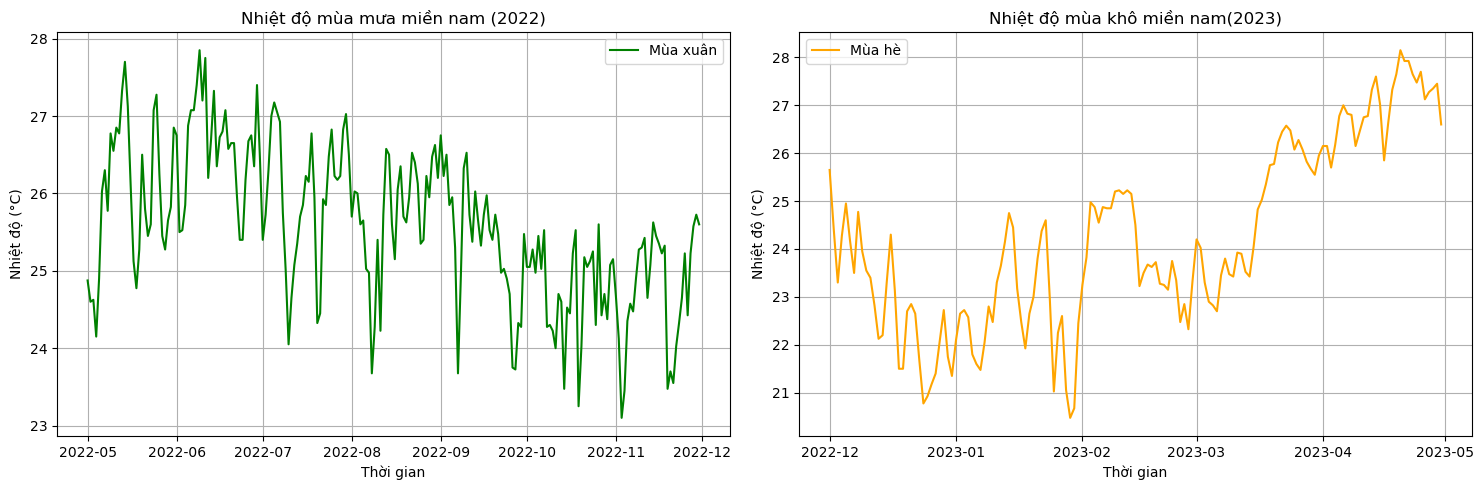

In [14]:
# Thiết lập biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mùa mưa
axs[0].plot(southern_rainy.index, southern_rainy['Temp'], color='green', label='Mùa xuân')
axs[0].set_title("Nhiệt độ mùa mưa miền nam (2022)")
axs[0].set_xlabel("Thời gian")
axs[0].set_ylabel("Nhiệt độ (°C)")
axs[0].legend()
axs[0].grid(True)

# Mùa khô
axs[1].plot(southern_dry.index, southern_dry['Temp'], color='orange', label='Mùa hè')
axs[1].set_title("Nhiệt độ mùa khô miền nam(2023)")
axs[1].set_xlabel("Thời gian")
axs[1].set_ylabel("Nhiệt độ (°C)")
axs[1].legend()
axs[1].grid(True)

# Hiển thị chú thích và biểu đồ
plt.tight_layout()
plt.show()

### Phân tích nhiệt độ theo các mùa:

#### Khu vực miền Bắc:
Mùa xuân (tháng 3 - tháng 5/2022):
- Nhiệt độ dao động từ khoảng 16°C đến 28°C và có xu hướng tăng dần.
- Tháng 5 có nhiệt độ cao nhất trong mùa xuân, đạt mức ~28°C.
- Cuối tháng 3, đầu tháng 4 là tháng lạnh nhất, với nhiệt độ xuống thấp khoảng 16°C.

Mùa hè (tháng 6 - tháng 8/2022):
- Nhiệt độ dao động từ 24.5°C đến 30°C, với nhiều đợt tăng nhiệt từ giữa tháng 6 đến giữa tháng 7 và sau đó giảm dần.
- Tháng 6 và đầu tháng 7 là thời điểm nóng nhất, với nhiệt độ gần ~30°C.
  
Mùa thu (tháng 9 - tháng 11/2022):
- Nhiệt độ dao động từ 17°C đến 28°C và có xu hướng giảm dần.
- Tháng 9 vẫn còn khá nóng (gần 28°C), nhưng nhiệt độ giảm dần trong tháng 10 và tháng 11, xuống thấp nhất là khoảng 17°C.

Mùa đông (tháng 12/2022 - tháng 2/2023):
- Nhiệt độ dao động từ 12°C đến 23°C, có một đợt tăng nhiệt bất thường từ 12°C to 22°C vào đầu tháng 1/2023.
- Tháng 1 là thời điểm lạnh nhất trong mùa đông, nhưng nhiệt độ bắt đầu tăng nhẹ vào cuối tháng 1, đầu tháng 2 và cao nhất là vào giữa tháng 2 với 23°C.

#### Khu vực miền Nam:
Mùa mưa (tháng 5 - tháng 11/2022):
- Nhiệt độ dao động từ 23°C đến 28°C, khá ổn định và giảm nhẹ vào cuối mùa mưa.
- Nhiệt độ cao nhất rơi vào tháng 5 và tháng 6, đạt mức ~28°C.
- Các tháng 9, 10 và 11 có xu hướng nhiệt độ giảm nhẹ, với mức thấp nhất khoảng 23°C.

Mùa khô (tháng 12/2022 - tháng 4/2023):
- Nhiệt độ dao động từ 20°C đến 28°C, giảm từ tháng 12 đến cuối tháng 1, sau đó tăng dần và tăng mạnh từ cuối tháng 3 đến tháng 4.
- Cuối tháng 3 đến tháng 4/2023 nhiệt độ tăng mạnh và cao nhất gần 28°C.
- Tháng 12/2022 và cuối tháng 1/2023 là thời điểm lạnh nhất, với mức nhiệt thấp nhất khoảng 20°C.

### Kết luận:

Miền Bắc:
- Biên độ nhiệt giữa các mùa lớn, chênh lệch rõ rệt giữa mùa đông và mùa hè.
- Mùa xuân và mùa hè có nhiệt độ cao nhất.
- Mùa đông có nhiệt độ thấp nhất, đặc biệt là giữa tháng 1/2023.
- Xu hướng tăng/giảm nhiệt độ rõ ràng theo từng mùa.

Miền Nam:
- Biên độ nhiệt giữa các mùa nhỏ hơn so với miền Bắc.
- Mùa mưa có nhiệt độ ổn định và cao hơn mùa khô.
- Mùa khô có nhiệt độ thấp nhất vào tháng 12 và tháng 1, tăng mạnh vào cuối mùa (tháng 3, tháng 4).
- Xu hướng tăng/giảm nhiệt độ ít rõ ràng hơn so với miền Bắc.

### 4. Nhiệt độ và độ ẩm tại Đà Nẵng và Nghệ An qua các năm có mối quan hệ như thế nào? Mối tương quan giữa nhiệt độ, độ ẩm và lượng mưa thay đổi ra sao theo các tháng trong năm?

#### Mục đích của câu hỏi:
Phân tích mối quan hệ giữa nhiệt độ, độ ẩm, lượng mưa giúp làm sáng tỏ đặc điểm khí hậu tại Đà Nẵng và Nghệ An – hai khu vực có vị trí địa lý và điều kiện thời tiết đặc thù, hỗ trợ việc dự báo và thích nghi với sự thay đổi của thời tiết, giúp con người điều chỉnh và kiểm soát các yếu tố này để tạo điều kiện sống và làm việc thuận lợi hơn.

#### Cách trả lời câu hỏi:
  - Bước 1 - Tiền xử lý:
    - Chọn hai khu vực Đà Nẵng và Nghệ An từ tập dữ liệu chính.
    - Dữ liệu nhiệt độ `Temp`, độ ẩm `Humidity`, lượng mưa `Precip` được chuyển đổi thành chuỗi thời gian (time series) và được tính giá trị trung bình theo tháng.

In [15]:
# Chọn khu vực Đà Nẵng và Nghệ An
mid_vietnam = ['Đà Nẵng', 'Nghệ An']

# Tính giá trị trung bình theo tháng
mid_vietnam_df = df[df['Address'].isin(mid_vietnam)].set_index('Datetime')
mid_vietnam_df = mid_vietnam_df[['Temp', 'Humidity', 'Precip']].resample("M").mean()
mid_vietnam_df['Month'] = mid_vietnam_df.index.month
mid_vietnam_df.head()

,Temp,Humidity,Precip,Month
Datetime,,,,
2019-01-31,20.785484,87.064516,4.787806,1
2019-02-28,24.194643,86.017857,0.362464,2
2019-03-31,25.053226,85.753226,1.378806,3
2019-04-30,28.291667,80.780000,1.448383,4
2019-05-31,29.722581,76.827419,3.138694,5


- Bước 2 - Vẽ biểu đồ:
  - Sử dụng biểu đồ phân tán (Scatter Plot) để thể hiện mối quan hệ giữa nhiệt độ và độ ẩm theo các tháng từ 2019 đến 2023. Đồng thời, vẽ đường hồi quy (Regression Line) để minh họa xu hướng chung. Kết hợp với biểu đồ histogram để mô tả phân phối nhiệt độ và độ ẩm riêng lẻ.
  - Sử dụng biểu đồ hộp (Box Plot) để phân tích sự phân bố nhiệt độ, độ ẩm, và lượng mưa theo từng tháng, giúp làm rõ đặc điểm biến động của các yếu tố khí hậu trong năm.

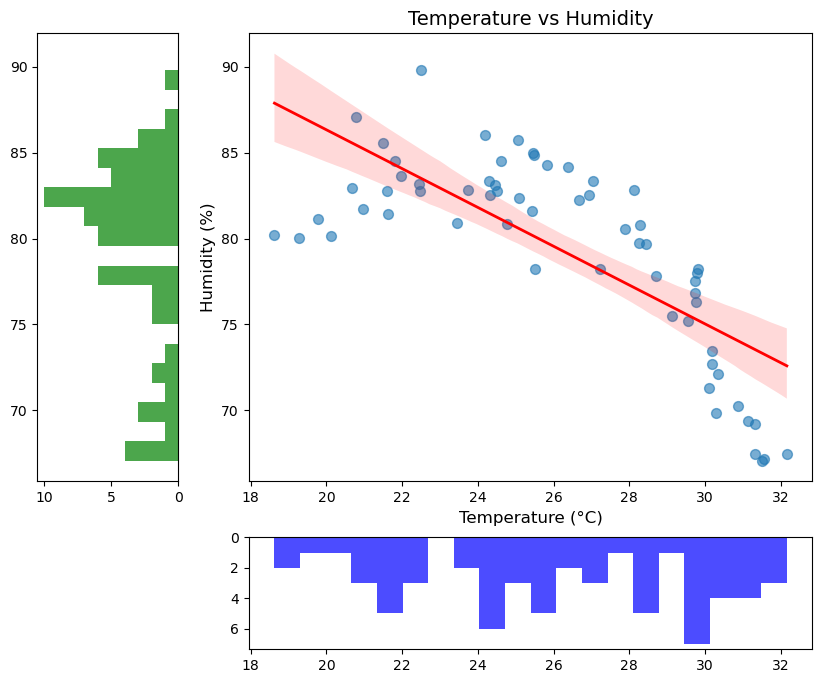

In [16]:
# Thiết lập biểu đồ
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)
scatter_axes = fig.add_subplot(grid[0:3, 1:])
y_hist_axes = fig.add_subplot(grid[0:3, 0], sharey=scatter_axes)
x_hist_axes = fig.add_subplot(grid[3, 1:], sharex=scatter_axes)

# Vẽ scatter plot cho nhiệt độ và độ ẩm 
scatter = scatter_axes.scatter(
    mid_vietnam_df['Temp'], 
    mid_vietnam_df['Humidity'], 
    cmap='viridis', 
    alpha=0.6, 
    s=50
)

# Vẽ đường hồi quy cho scatter plot
sns.regplot(
    data=mid_vietnam_df, 
    x='Temp', 
    y='Humidity', 
    ax=scatter_axes, 
    scatter=False,
    line_kws={'color': 'red', 'linewidth': 2}
)

# Vẽ histogram trục Y (Humidity)
y_hist_axes.hist(mid_vietnam_df['Humidity'], bins=20, 
                 orientation='horizontal', color='green', alpha=0.7)
y_hist_axes.invert_xaxis()

# Vẽ histogram trục X (Temp)
x_hist_axes.hist(mid_vietnam_df['Temp'], bins=20, 
                 color='blue', alpha=0.7)
x_hist_axes.invert_yaxis()

# Thêm tiêu đề và tên trục
scatter_axes.set_title('Temperature vs Humidity', fontsize=14)
scatter_axes.set_xlabel('Temperature (°C)', fontsize=12)
scatter_axes.set_ylabel('Humidity (%)', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [17]:
correlation = mid_vietnam_df['Temp'].corr(mid_vietnam_df['Humidity'])
print(f"Correlation coefficient between Temp and Humidity: {correlation:.2f}")

Correlation coefficient between Temp and Humidity: -0.75


#### Từ biểu đồ tương quan giữa nhiệt độ và độ ẩm, ta kết luận:
Nhiệt độ và độ ẩm tại Đà Nẵng và Nghệ An có mối quan hệ tương quan nghịch mạnh mẽ (hệ số tương quan -0.75). Khi nhiệt độ tăng, độ ẩm có xu hướng giảm rõ rệt và ngược lại. Cụ thể, độ ẩm đạt mức cao nhất (~85%) khi nhiệt độ trong khoảng 18-24°C, và giảm xuống mức thấp nhất (~70-75%) khi nhiệt độ tăng lên 28-32°C. Biểu đồ phân phối cho thấy nhiệt độ tập trung chủ yếu trong khoảng 24-30°C và độ ẩm phân bố nhiều nhất trong khoảng 75-85%. Mối quan hệ này phản ánh rõ nét đặc trưng khí hậu nhiệt đới ẩm ở miền Trung Việt Nam, nơi nhiệt độ cao trong mùa hè làm tăng tốc độ bay hơi nước, dẫn đến độ ẩm giảm, gây cảm giác oi bức. Ngược lại, vào mùa đông, nhiệt độ giảm kéo theo độ ẩm tăng, tạo ra thời tiết lạnh ẩm, ảnh hưởng đến sức khỏe con người.

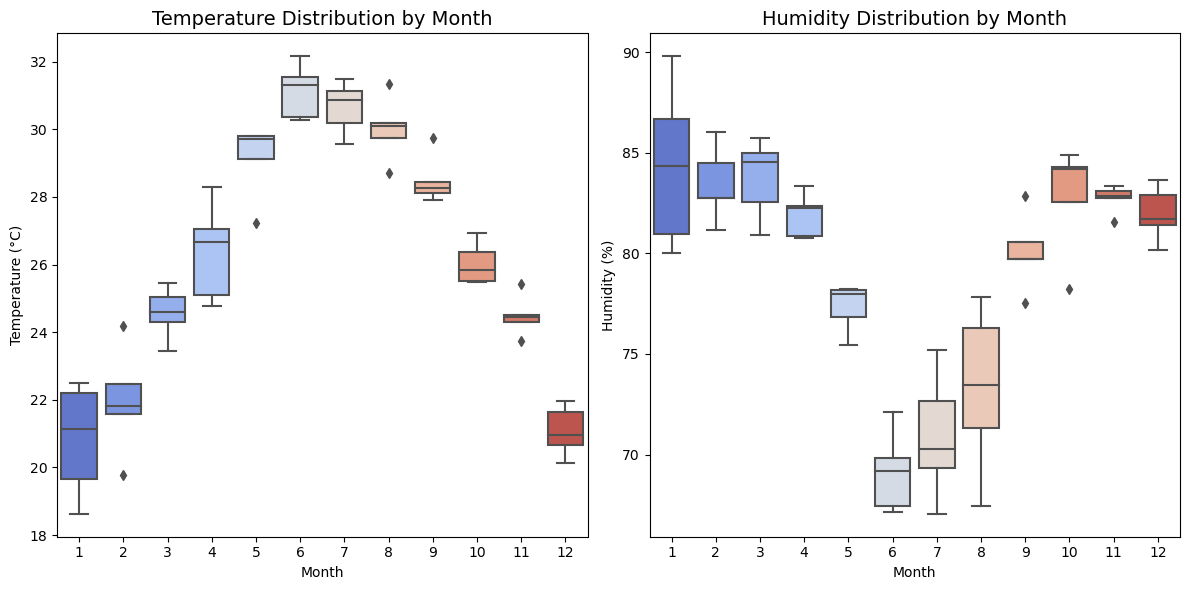

In [18]:
# Thiết lập biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ boxplot nhiệt độ
plt.subplot(1, 2, 1)
sns.boxplot(x=mid_vietnam_df['Month'], y=mid_vietnam_df['Temp'], palette='coolwarm')
plt.title("Temperature Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")

# Vẽ boxplot độ ẩm
plt.subplot(1, 2, 2)
sns.boxplot(x=mid_vietnam_df['Month'], y=mid_vietnam_df['Humidity'], palette='coolwarm')
plt.title("Humidity Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Humidity (%)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

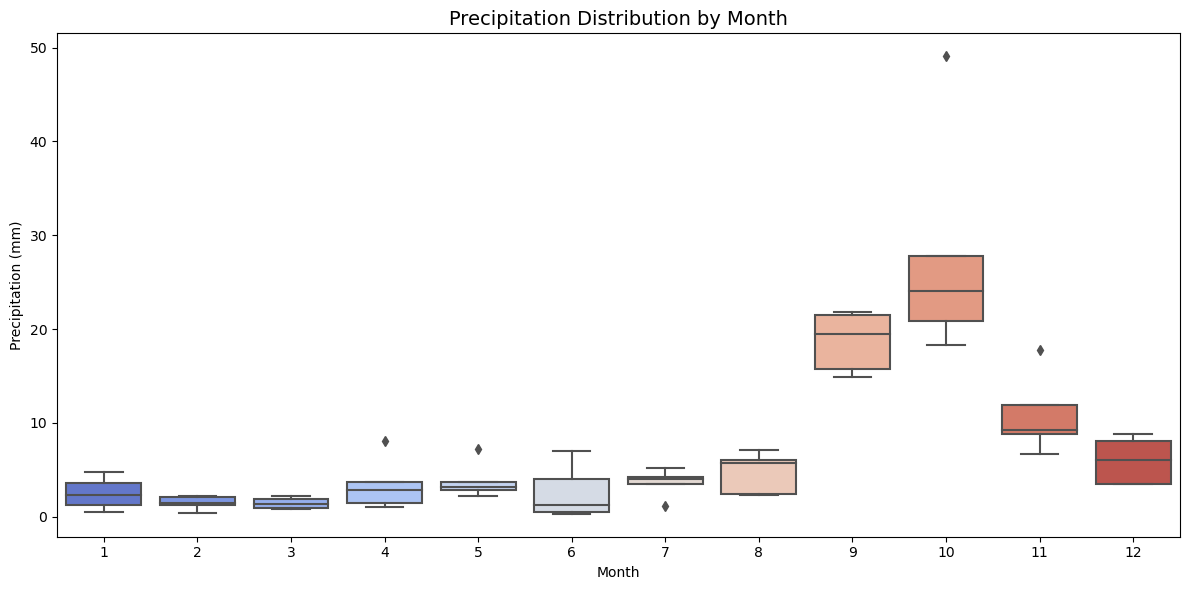

In [19]:
# Thiết lập biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ boxplot lượng mưa
sns.boxplot(x=mid_vietnam_df['Month'], y=mid_vietnam_df['Precip'], palette='coolwarm')
plt.title("Precipitation Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Từ ba biểu đồ Boxplot nhiệt độ, độ ẩm và lượng mưa theo tháng, ta kết luận:
Các biểu đồ hộp về nhiệt độ, độ ẩm và lượng mưa theo tháng tại Đà Nẵng và Nghệ An cho thấy sự phân hóa rõ rệt giữa hai mùa:
- Mùa khô (tháng 1-8): Nhiệt độ trung bình tăng dần từ 20°C (tháng 1) lên mức cao nhất 30-32°C vào tháng 6-8, sau đó giảm dần. Biên độ dao động nhiệt độ lớn nhất vào mùa hè. Độ ẩm không khí có xu hướng giảm dần, thấp nhất vào tháng 6-8 (~70-75%). Lượng mưa rất thấp, đặc biệt tháng 1-4 gần như không có mưa. Tháng 5 và tháng 6 là thời điểm nóng nhất, thích hợp cho du lịch nhưng môi trường khá khô do độ ẩm thấp.
- Mùa mưa (tháng 9-12): Lượng mưa tăng đột biến, đặc biệt tháng 10 có lượng mưa lớn nhất do ảnh hưởng của bão và áp thấp nhiệt đới. Độ ẩm trong thời gian này rất cao, đạt mức trung bình ~85% vào tháng 1-4 và 9-12. Thời tiết mùa mưa thường xấu, mưa to, gió mạnh, gây khó khăn cho các hoạt động ngoài trời.

### 5. Tốc độ gió và áp suất không khí tại Hồ Chí Minh và Bến Tre qua các năm có mối quan hệ như thế nào? Mối tương quan giữa tốc độ gió và áp suất không khí thay đổi ra sao theo các tháng trong năm?

#### Mục đích của câu hỏi:
Phân tích mối tương quan giữa tốc độ gió và áp suất không khí giúp khám phá các đặc điểm khí hậu vùng Nam Bộ, đặc biệt là sự khác biệt giữa hai khu vực Hồ Chí Minh và Bến Tre. Kết quả phân tích có thể được sử dụng để dự báo các hiện tượng thời tiết cực đoan như áp thấp nhiệt đới hoặc gió mạnh, từ đó hỗ trợ các biện pháp thích nghi và giảm thiểu tác động.

#### Cách trả lời câu hỏi:
  - Bước 1 - Tiền xử lý:
    - Chọn hai khu vực Hồ Chí Minh và Bến Tre từ tập dữ liệu chính.
    - Dữ liệu tốc độ gió `Windspeed`, áp suất không khí `Pressure` được chuyển đổi thành chuỗi thời gian (time series) và được tính giá trị trung bình theo tháng.

In [20]:
# Chọn khu vực Hồ Chí Minh và Bến Tre
southern = ['Hồ Chí Minh', 'Bến Tre']
# Tính giá trị trung bình theo tháng
southern_df = df[df['Address'].isin(southern)].set_index('Datetime')
southern_df = southern_df[['Windspeed', 'Pressure']].resample("M").mean()
southern_df['Month'] = southern_df.index.month
southern_df.head()

,Windspeed,Pressure,Month
Datetime,,,
2019-01-31,16.472581,1011.841935,1
2019-02-28,19.496429,1012.323214,2
2019-03-31,17.874194,1010.658065,3
2019-04-30,17.246667,1008.901667,4
2019-05-31,18.238710,1007.935484,5


- Bước 2 - Vẽ biểu đồ:
  - Sử dụng biểu đồ phân tán (Scatter Plot) để thể hiện mối quan hệ giữa tốc độ gió và áp suất không khí theo các tháng từ 2019 đến 2023. Đồng thời, vẽ đường hồi quy (Regression Line) để minh họa xu hướng chung. Kết hợp với biểu đồ histogram để mô tả phân phối tốc độ gió và áp suất không khí riêng lẻ.
  - Sử dụng biểu đồ hộp (Box Plot) để phân tích sự phân bố tốc độ gió và áp suất không khí theo từng tháng, giúp làm rõ đặc điểm biến động của các yếu tố khí hậu trong năm.

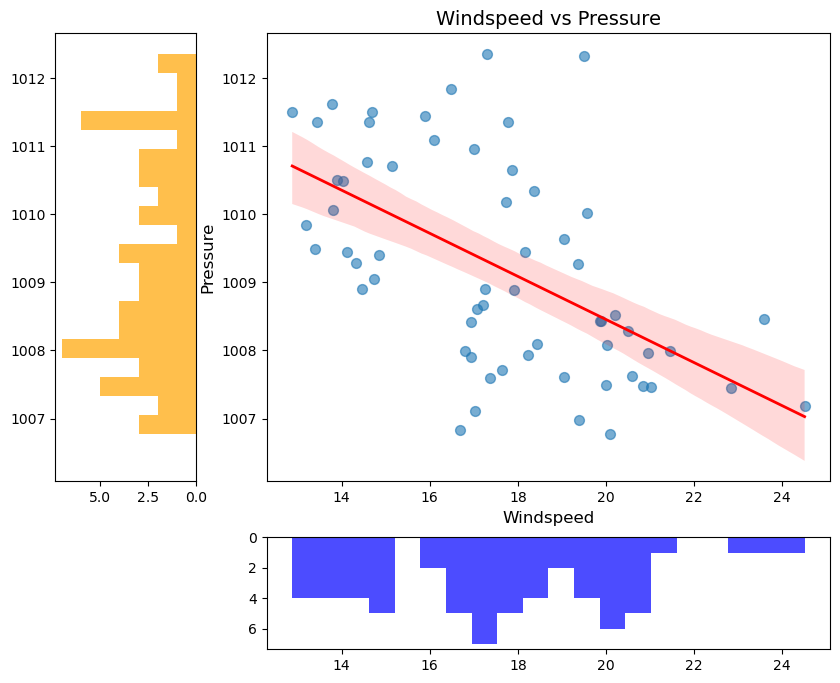

In [21]:
# Thiết lập biểu đồ
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)
scatter_axes = fig.add_subplot(grid[0:3, 1:])
y_hist_axes = fig.add_subplot(grid[0:3, 0], sharey=scatter_axes)
x_hist_axes = fig.add_subplot(grid[3, 1:], sharex=scatter_axes)

# Vẽ scatter plot cho nhiệt độ và độ ẩm 
scatter = scatter_axes.scatter(
    southern_df['Windspeed'], 
    southern_df['Pressure'], 
    cmap='crest', 
    alpha=0.6, 
    s=50
)

# Vẽ đường hồi quy cho scatter plot
sns.regplot(
    data=southern_df, 
    x='Windspeed', 
    y='Pressure', 
    ax=scatter_axes, 
    scatter=False,
    line_kws={'color': 'red', 'linewidth': 2}
)

# Histogram trục Y (Pressure)
y_hist_axes.hist(southern_df['Pressure'], bins=20, 
                 orientation='horizontal', color='orange', alpha=0.7)
y_hist_axes.invert_xaxis()

# Histogram trục X (Windspeed)
x_hist_axes.hist(southern_df['Windspeed'], bins=20, 
                 color='blue', alpha=0.7)
x_hist_axes.invert_yaxis()

# Thêm tiêu đề và tên trục
scatter_axes.set_title('Windspeed vs Pressure', fontsize=14)
scatter_axes.set_xlabel('Windspeed', fontsize=12)
scatter_axes.set_ylabel('Pressure', fontsize=12)
plt.show()

In [22]:
correlation = southern_df['Windspeed'].corr(southern_df['Pressure'])
print(f"Correlation coefficient between Windspeed and Pressure: {correlation:.2f}")

Correlation coefficient between Windspeed and Pressure: -0.56


#### Từ biểu đồ tương quan giữa tốc độ gió và áp suất không khí, ta kết luận:
- Tốc độ gió và áp suất không khí tại Hồ Chí Minh và Bến Tre qua các năm có mối quan hệ tương quan nghịch, khi áp suất không khí tăng thì tốc độ gió có xu hướng giảm và ngược lại. Hệ số tương quan -0.55 thể hiện mối tương quan nghịch ở mức độ trung bình khá, được minh họa qua đường hồi quy dốc xuống trên biểu đồ.
- Khi áp suất không khí thấp (thường trong khoảng 1007-1009 hPa), tốc độ gió có xu hướng cao (thường trong khoảng 18-24 km/h). Điều này thường xảy ra trong mùa mưa bão, khi các hệ thống áp thấp hoạt động mạnh, tạo ra sự chênh lệch áp suất lớn, dẫn đến gió mạnh. Hiện tượng này có thể dẫn đến các hiện tượng thời tiết cực đoan như lốc xoáy, gió giật, gây thiệt hại về người và tài sản.
- Ngược lại, khi áp suất không khí cao (thường trong khoảng 1010-1012 hPa), tốc độ gió có xu hướng thấp (thường trong khoảng 14-18 km/h). Điều này thường xảy ra trong mùa khô, khi thời tiết ổn định, ít có sự chênh lệch áp suất lớn.

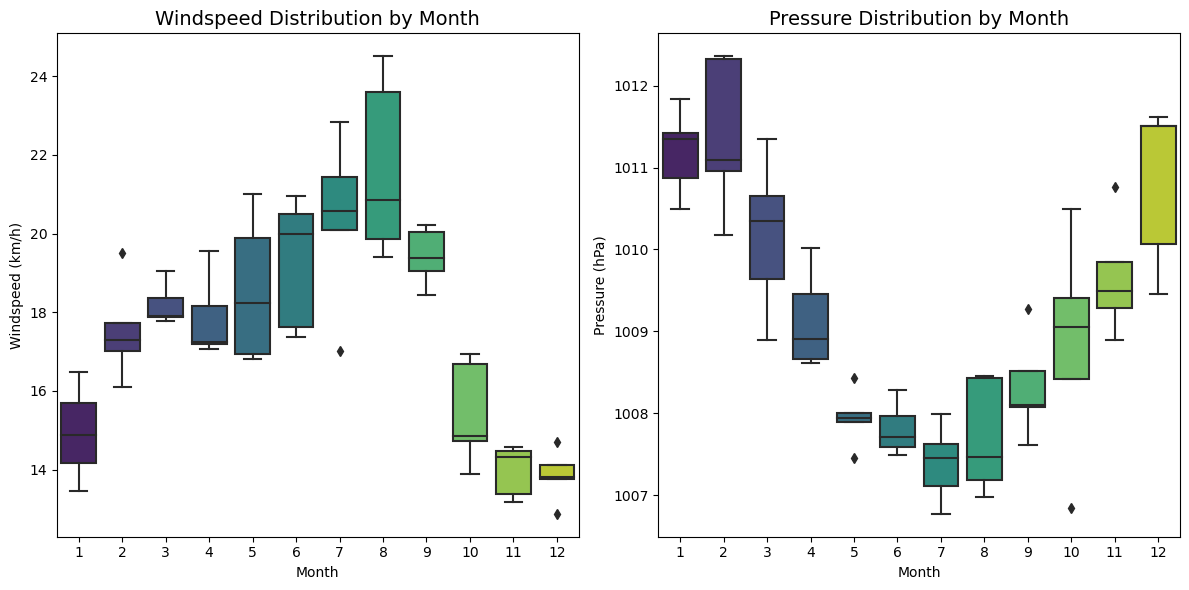

In [23]:
# Thiết lập biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ boxplot tốc độ gió
plt.subplot(1, 2, 1)
sns.boxplot(x=southern_df['Month'], y=southern_df['Windspeed'], palette='viridis')
plt.title("Windspeed Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Windspeed (km/h)")

# Vẽ boxplot áp suất không khí
plt.subplot(1, 2, 2)
sns.boxplot(x=southern_df['Month'], y=southern_df['Pressure'], palette='viridis')
plt.title("Pressure Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Pressure (hPa)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Từ hai biểu đồ Boxplot tốc độ gió và áp suất không khí theo tháng, ta kết luận:
- Tốc độ gió và áp suất không khí biến động theo mùa: Tốc độ gió có xu hướng cao hơn vào mùa mưa (tháng 6-9, trung bình 19-24 km/h) và thấp hơn vào mùa khô (tháng 11-2, trung bình 13-17 km/h). Ngược lại, áp suất không khí cao hơn vào mùa khô (tháng 1-4, trung bình 1010-1013 hPa) và thấp hơn vào mùa mưa (tháng 6-10, trung bình 1007-1009 hPa).
- Tháng 8 có dấu hiệu bất thường: Tốc độ gió trung bình trong tháng 8 cao bất thường so với xu hướng chung, có thể do ảnh hưởng của bão hoặc áp thấp nhiệt đới xuất hiện vào thời gian này.
- Mối quan hệ nghịch: Sự biến động ngược chiều giữa tốc độ gió và áp suất không khí theo các tháng củng cố thêm cho kết luận về mối quan hệ tương quan nghịch giữa hai yếu tố này đã nêu ở trên. Khi áp suất không khí giảm (mùa mưa), tốc độ gió có xu hướng tăng và ngược lại.